O arquivo XLSX contém os dados de uma carteira de investimentos fictícia.

In [24]:
import pandas as pd
import yfinance 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


df_carteira = pd.read_excel("Carteira.xlsx")
print(df_carteira)

    Ativos  Tipo  Qtde
0   BOVA11   ETF   100
1   SMAL11   ETF   100
2    MGLU3  Ação   100
3    BBDC4  Ação   100
4    ITUB4  Ação   300
5    ENEV3  Ação   100
6    MOVI3  Ação   100
7   BPAC11  Ação   100
8    PETR3  Ação   100
9   BCRI11   FII   100
10  VILG11   FII   100
11  KNRI11   FII   100
12  XPLG11   FII   100


Importar as cotações do yahoo finance e analisar o desempenho do IBOVESPA 

In [25]:
data_fim = datetime.now()
data_inicio = data_fim - timedelta(days=365)
lista_ativos = list(df_carteira['Ativos'].astype(str) + '.SA') # adicionando o sufixo .SA para pegar as ações da bolsa brasileira e gerando uma lista para passar como parametro
# print(lista_ativos)
df_cotacoes = yfinance.download(lista_ativos, start=data_inicio, end=data_fim)['Close']


C:\Users\wanderson.de.correia\AppData\Local\Temp\ipykernel_4904\3981971835.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_cotacoes = yfinance.download(lista_ativos, start=data_inicio, end=data_fim)['Close']
[*********************100%***********************]  13 of 13 completed


Tratar os dados vazios, existem várias técnicas para isso, como remoção, preenchimento com média, mediana, etc. ou preencher com os dados do dia anterior. é necessário analisar o impacto de cada técnica.
Preencher com o dia anterior pode ser uma boa opção para dados financeiros, pois o preço de um ativo geralmente não muda drasticamente de um dia para o outro.
Analisar o desempenho dos ativos da carteira e do IBOVESPA, calcular retornos diários, mensais e anuais, volatilidade, correlação entre os ativos, etc.

validar as ações que tiveram melhor retorno - necessário normalizar a base de dados, porque os ativos tem valores diferentes e visualmente não dá para comparar os retornos.

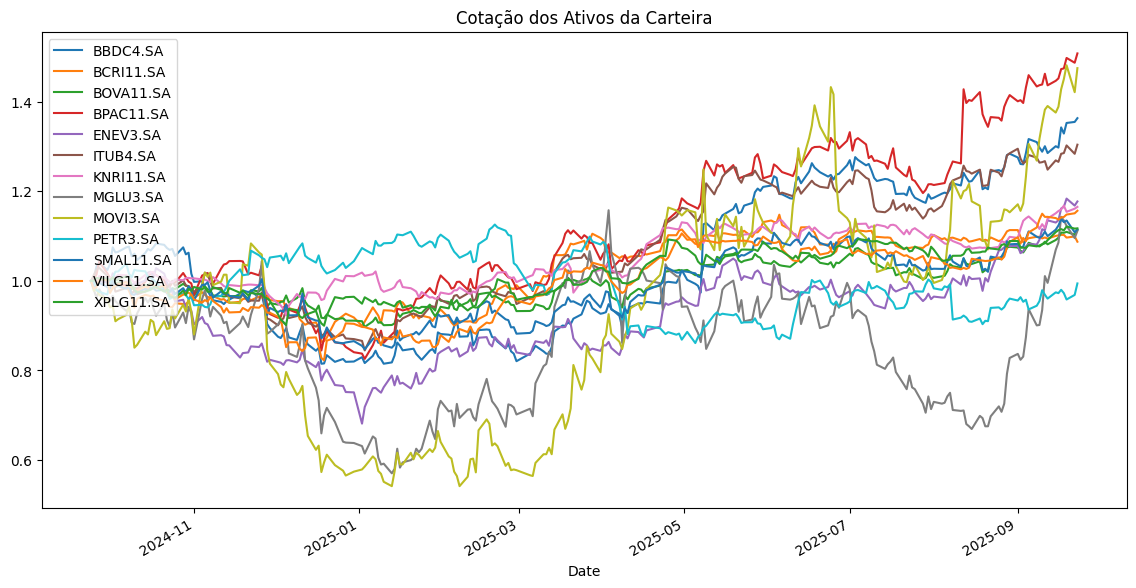

In [31]:
#print(df_cotacoes.info())
df_cotacoes.ffill(inplace=True) # foward fill - preenchendo os dados vazios com o valor do dia anterior
# na verade neste exmplo não há dados vazios, mas é uma boa prática fazer isso
# print(df_cotacoes.info())   
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0] # normalizando os dados para comparar o desempenho dos ativos

df_cotacoes_norm.plot(figsize=(14, 7))
plt.title('Cotação dos Ativos da Carteira')
plt.legend(loc='upper left')
plt.show()

Buscando o IBOVESPA 

In [ ]:
df_ibov = yfinance.download("^BVSP", start=data_inicio, end=data_fim)['Close']


C:\Users\wanderson.de.correia\AppData\Local\Temp\ipykernel_4904\3774689501.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ibov = yfinance.download("^BVSP", start=data_inicio, end=data_fim)['Close']
[*********************100%***********************]  1 of 1 completed


Calcular o valor investido em cada ativo e o valor total da carteira ao longo do tempo.
axis=1 soma as colunas
axis=0 soma as linhas


In [41]:
df_valor_investido = pd.DataFrame()
for ativo in df_carteira["Ativos"]:
    qtd_acoes = df_carteira.loc[df_carteira["Ativos"] == ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = df_cotacoes[f"{ativo}.SA"] * qtd_acoes  
df_valor_investido["Total"] = df_valor_investido.sum(axis=1) 
display(df_valor_investido)
    #preco_inicial = df_cotacoes[ativo].iloc[0]
    #pd_valor_investido[ativo] = df_cotacoes[ativo] * quantidade



,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,PETR3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2024-09-24,12867.999268,9930.000305,989.241695,1308.935642,8980.570221,1402.000046,614.717913,3169.599533,3513.564682,5775.581741,7650.234985,12698.938751,9042.310333,77943.695116
2024-09-25,12791.999817,9769.999695,970.796680,1317.145157,9093.739128,1390.999985,601.354551,3184.138870,3516.167068,5760.976791,7518.803406,12652.180481,9046.833038,77615.134668
2024-09-26,12933.000183,9820.999908,951.380730,1350.894642,9209.424019,1397.000027,603.263569,3215.156555,3442.426300,5761.836624,7542.369843,12671.434021,9103.836823,78003.023243
2024-09-27,12903.999329,9891.000366,970.796680,1362.752533,9244.629478,1401.000023,595.627308,3305.300903,3428.544998,5824.549484,7687.398529,12836.474609,9092.978668,78545.052910
2024-09-30,12842.999268,9795.999908,941.672707,1340.860939,9081.164360,1397.000027,588.945627,3224.849319,3406.856537,5764.413071,7660.205841,12772.289276,9096.598053,77913.854933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-17,14260.000610,11300.000000,1131.000042,1757.999992,11531.999588,1629.000092,877.999973,4670.000076,3443.999863,6370.000076,8736.000061,14727.000427,10090.000153,90525.000954
2025-09-18,14252.999878,11236.000061,1122.999954,1739.999962,11547.000504,1634.000015,892.000008,4675.000000,3418.000031,6370.000076,8744.000244,14835.000610,10063.999939,90531.001282
2025-09-19,14278.999329,11270.999908,1110.999966,1770.999908,11700.000000,1660.000038,910.999966,4749.000168,3368.000031,6334.999847,8784.999847,14660.000610,10141.999817,90741.999435


Nomalizando os dados para comparar o desempenho dos ativos

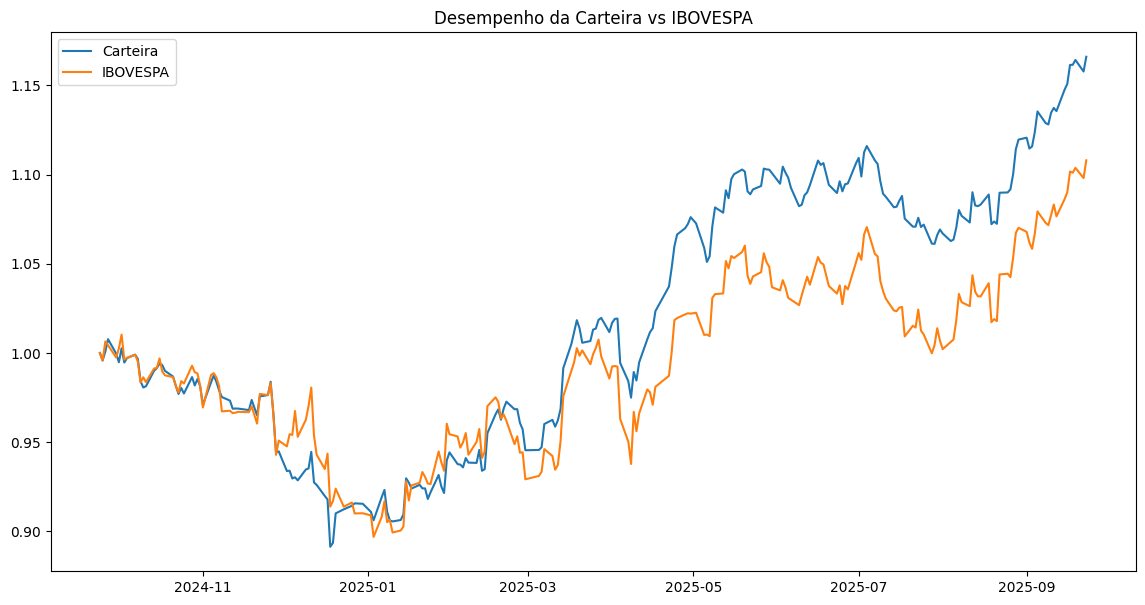

In [77]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_ibov_norm.columns = ["IBOVESPA"] # renomeando a coluna para evitar conflito na hora de fazer as comparacoes
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df_valor_investido_norm["Total"], label='Carteira')
ax.plot(df_ibov_norm,label='IBOVESPA')
ax.set_title('Desempenho da Carteira vs IBOVESPA')
ax.legend(loc='upper left')
plt.show()



Calculando o retorno e a correlação entre os ativos

In [78]:
retorno_ibov = df_ibov_norm["IBOVESPA"][-1] -1   
retorno_carteira = df_valor_investido_norm ["Total"] [-1] -1
print(f'Retorno IBOVESPA: {retorno_ibov:.2%}')
print(f'Retorno Carteira: {retorno_carteira:.2%}')     
 


Retorno IBOVESPA: 10.80%
Retorno Carteira: 16.60%


C:\Users\wanderson.de.correia\AppData\Local\Temp\ipykernel_4904\3690737343.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = df_ibov_norm["IBOVESPA"][-1] -1
C:\Users\wanderson.de.correia\AppData\Local\Temp\ipykernel_4904\3690737343.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_carteira = df_valor_investido_norm ["Total"] [-1] -1


 Para juntar os dois em um único DataFrame comparativo:

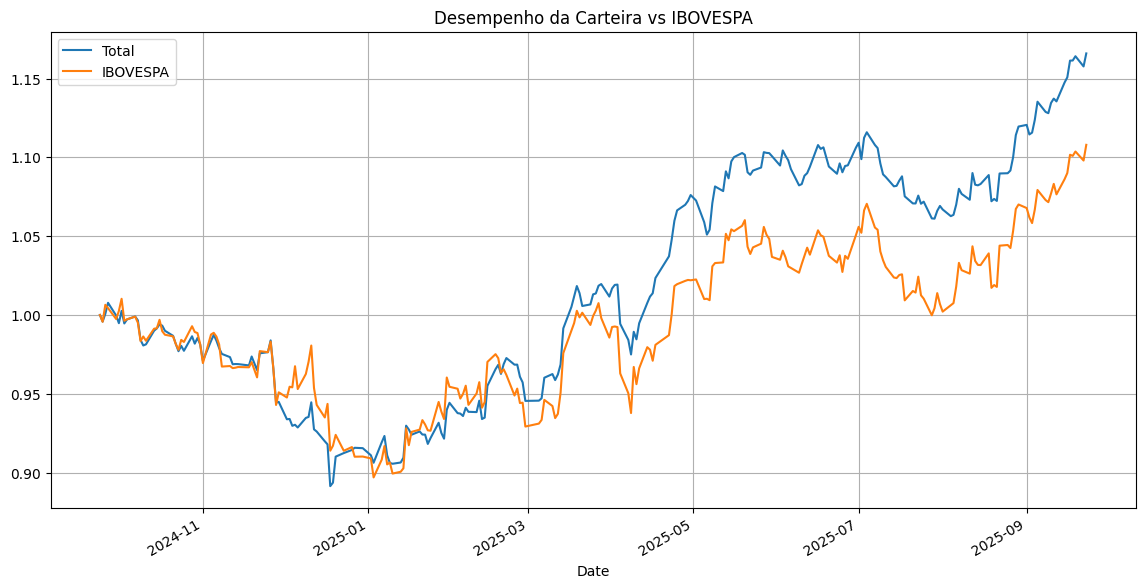

In [80]:

df_comparativo = pd.concat([
    df_valor_investido_norm["Total"],
    df_ibov_norm["IBOVESPA"]
], axis=1)

df_comparativo.plot(figsize=(14, 7), title="Desempenho da Carteira vs IBOVESPA")
plt.grid(True)
plt.show()
